CLASSIFICATION WITH LOGISTIC REGRESSION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

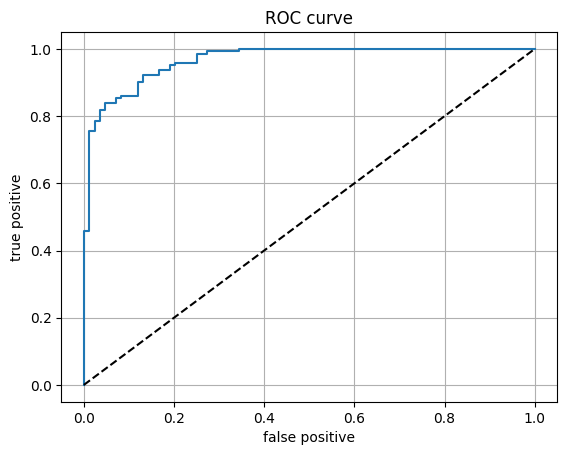

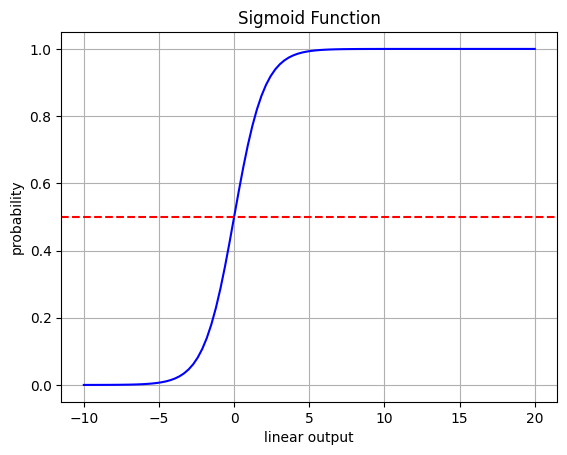

In [22]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
import numpy as np
#load dataset
df=pd.read_csv("cancer_dataset.csv")
print(df.info())
X=df[['radius_mean','texture_mean','perimeter_mean','area_mean']]
df['target']=df['diagnosis'].map({'M':0,'B':1})
y=df['target']
#splitting dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=45)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=LogisticRegression()
model.fit(X_train,y_train)
p=model.predict(X_test)
prob=model.predict_proba(X_test)[:,1]
print("confusion matrix \n",confusion_matrix(y_test,p))
print("\n classification report\n",classification_report(y_test,p))
roc_auc=roc_auc_score(y_test,prob)
#area under curve
fp,tp,_=roc_curve(y_test,prob)
plt.plot(fp,tp)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("false positive")
plt.ylabel("true positive")
plt.title("ROC curve")
plt.grid(True)
plt.show()
def sigmoid(z):
    return 1/(1+np.exp(-z))
z = np.linspace(-10,20,100)
plt.plot(z,sigmoid(z),color='blue')
plt.axhline(0.5,color='red',linestyle='--',label='Threshold=0.5')#threshold line
plt.title("Sigmoid Function")
plt.xlabel("linear output")
plt.ylabel("probability")
plt.grid(True)
plt.show()